# 介绍
逻辑回归（Logistic Regression），又叫逻辑斯蒂回归，是机器学习中一种十分基础的分类方法，由于算法简单而高效，在实际场景中得到了广泛的应用。本次实验中，我们将探索逻辑回归的原理及算法实现，并使用 scikit-learn 构建逻辑回归分类预测模型。

# 线性可分和不可分
首先，我们需要先接触一个概念，那就是线性可分。如下图所示，二维平面内，如果只使用一条直接就可以将样本分开，则称为线性可分，否则为线性不可分。
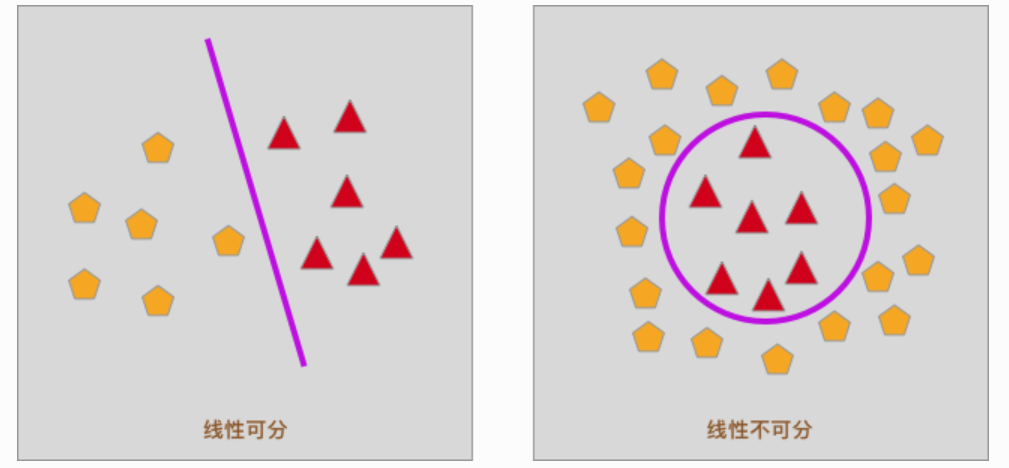



# 使用线性回归分类
前面的实验中，我们重点学习了线性回归。简单概括起来，线性回归是通过拟合一条直线去预测更多的连续值。其实，除了回归问题，线性回归也可以用来处理特殊情况下的分类问题。例如：

如果我们有如下的数据集，这个数据集仅包含有 1 个特征和 1 个目标值。例如，我们对某一门课程的学员成绩进行统计，通过学习时长决定这门课程是否 PASS。

In [1]:
scores = [
    [1],
    [1],
    [2],
    [2],
    [3],
    [3],
    [3],
    [4],
    [4],
    [5],
    [6],
    [6],
    [7],
    [7],
    [8],
    [8],
    [8],
    [9],
    [9],
    [10],
]
passed = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]

上面的数据集中，passed 只有$0$和$1$，也就是数值型数据。不过，这里我们将$0$和$1$分别表示为通过和不通过，那么就转换成了一个分类问题。并且，这是一个典型的二分类问题。二分类表示只有两种类别，也可以称之为：$0-1$分类问题。

对于这样一个二分类问题，怎样用线性回归去解决呢？

在这里，我们定义线性拟合函数$f(x)$计算的结果大于0.5，则表示通过，否则不通过。
$$
f(x) > 0.5 => y =1\\
f(x) \leq 0.5 => y =0
$$

下面，我们就开始实战内容。首先，绘制数据集对应到二维平面中的散点图。

Text(0, 0.5, 'passed')

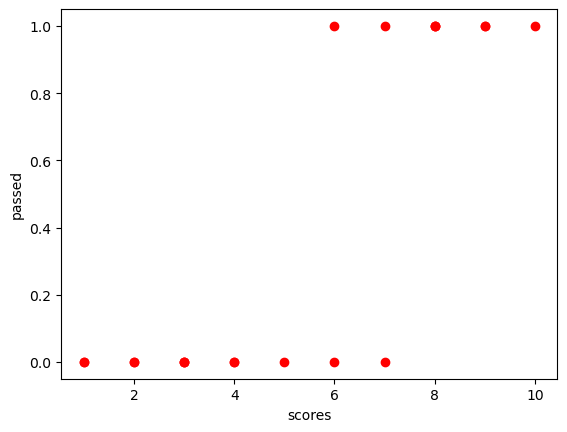

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(scores, passed, color="r")
plt.xlabel("scores")
plt.ylabel("passed")

然后，我们使用 scikit-learn 完成线性回归拟合的过程


In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(scores, passed)
model.coef_, model.intercept_

(array([0.1446863]), -0.36683738796414833)

接下来，将拟合直线绘制到散点图中。

Text(0, 0.5, 'passed')

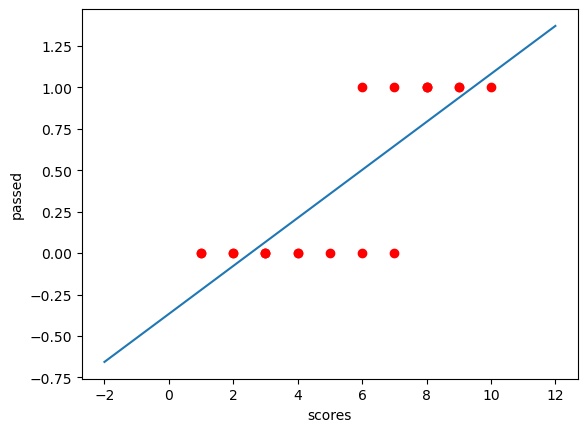

In [4]:
import numpy as np

x = np.linspace(-2, 12, 100)

plt.plot(x, model.coef_[0] * x + model.intercept_)
plt.scatter(scores, passed, color="r")
plt.xlabel("scores")
plt.ylabel("passed")

如下图所示，凡是 scores 大于橙色竖线对应$x$坐标值的部分均会被判断为 PASS，也就是被棕色选框圈出的 2 个点就被错误分类。
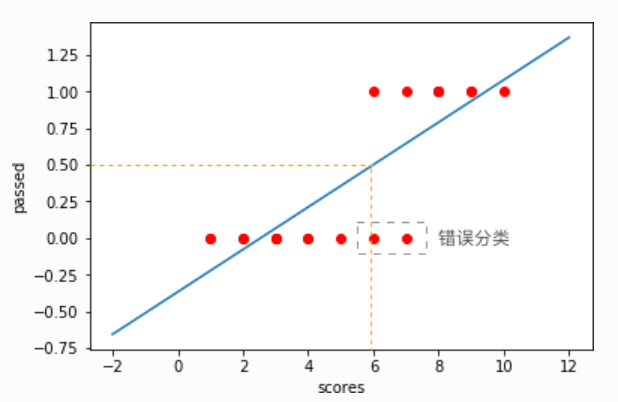

# Sigmoid分布函数

在上面的内容中，线性回归对二分类问题并不理想，所以我们通过逻辑回归来完成$0-1$分类问题。
先介绍一下Sigmoid函数，Sigmoid函数是一个单调函数，其函数表达式为：

$$
f(x)=\frac{1}{1+e^{-x}}
$$

下面，我们将这个函数的曲线绘制出来




In [5]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

Text(0, 0.5, 'y')

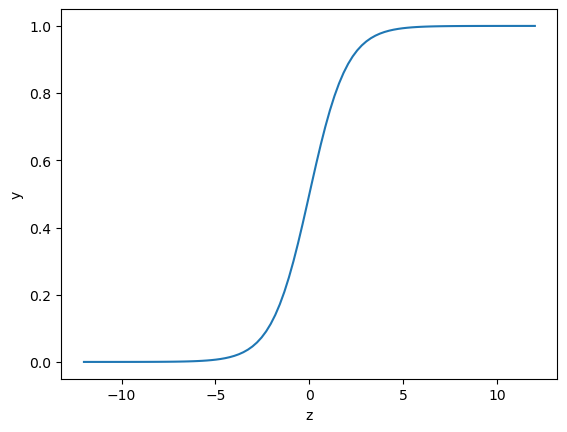

In [6]:
z = np.linspace(-12, 12, 100)  # 生成等间距 x 值方便绘图
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("y")

上图就是Sigmoid函数的图像，这个图像呈现出完美的S形，如果我们以0.5为阈值，那么当x大于0.5时，预测值为1，小于0.5时，预测值为0。

# 逻辑回归模型

这里又要引入一条数学定义。那就是，如果一组连续随机变量符合 Sigmoid 函数样本分布，就称作为逻辑分布。\
逻辑分布是概率论中的定理，是一种连续型的概率分布。\
那么，这里就考虑将二者结合起来，也就是把线性函数拟合的结果使用 Sigmoid 函数压缩到$(0,1)$之间。如果线性函数的$y$值越大，也就代表概率越接近于 1，反之接近于 0。
所以，在逻辑回归中，定义：
$$
z_i = w_0x_0 + w_1x_1 + ... + w_ix_i = w^T x\\
f(z_i) = \frac{1}{1 + e^{-z_i}}
$$

在这个公式中，我们对每一个特征$x$乘上系数$w_i$，然后使用 Sigmoid 函数计算$f(z)$的值得到概率，其中z可以被看作是分类边界。
$$
h_w(x) = f(w^Tx) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-w^T x}}
$$

由于目标值$y$只有 0 和 1 两个值，那么如果记$y=1$的概率为$h_w(x)$，则此时$y=0$的概率为$1-h_w(x)$。那么，我们可以记作逻辑回归模型条件概率分布：
$$
P(Y=y|x) = \begin{cases} 
h_w(x) & , y = 1 \\
1 - h_w(x) & , y = 0 
\end{cases}
$$

上式不方便计算，所以我们用似然函数来表示：
$$
L(w) = \prod_{i=1}^n P(Y=y_i|x_i) = \prod_{i=1}^n h_w(x_i)^{y_i} (1 - h_w(x_i))^{1 - y_i}
$$

这里，我们使用对数来计算似然函数，因为似然函数是一个连续的函数，而对数函数是一个单调函数，所以对数函数的计算结果比似然函数的计算结果更方便。\
所以，似然函数可以表示为：
$$
\log L(w) = \sum_{i=1}^n y_i \log h_w(x_i) + (1 - y_i)\log (1 - h_w(x_i))

# 对数损失函数
事实上，上面的损失函数衡量了事件发生的总概率。根据最大似然估计原理，只需要对$L(w)$求最大值，即可得到$w$的估计值。然而在机器学习问题中，我们需要一个损失函数，并通过求其最小值来进行参数优化，所以我们需要将$L(w)$取负号，得到负对数损失函数。
$$
J(w) = -\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\log(h_w(x^{(i)})) + (1-y^{(i)})\log(1-h_w(x^{(i)}))\right]
$$

为了衡量整个数据集上的平均损失，所以上式在全部样本上求取了平均值，构成逻辑回归最终的对数损失函数。此时，你可能会想到逻辑回归为什么不用线性回归中的平方损失函数呢？

这其实是有数学依据的。我们设置损失函数的目的是接下来通过最优化方法求得损失函数的最小值，损失最小即代表模型最优。在最优化求解中，只有 **凸函数** 往往才能求得全局最小值，非凸函数往往得到的是局部最优。然而，平方损失函数用于逻辑回归求解时得到的是非凸函数，即大多数情况下无法求得全局最优。这里使用了对数损失函数就避免了这个问题。

下面我们用代码实现上式：

In [7]:
def loss(h, y):
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss

# 梯度下降法
上面，我们已经成功定义并实现了对数损失函数。所以，现在离求解最优参数只有一步之遥了，那就是求得损失函数的极小值。

为了求解上式的极小值，这里引入一种叫「梯度下降」的求解方法。梯度下降法是一种十分常用且经典的最优化算法，通过这种方法我们就能快速找到函数的最小值。

梯度是一个向量，它表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）。简而言之，对于一元函数而言，梯度就是指在某一点的导数。而对于多元函数而言，梯度就是指在某一点的偏导数组成的向量。

既然，函数在沿梯度方向变化最快，所以「梯度下降法」的核心就是，我们沿着梯度下降方向去寻找损失函数的极小值（梯度的反方向）。

所以，我们针对上式求偏导，先对其进行化简。

对于$log(h_w(x^{(i)})$，有：
$$
\begin{align*}
\log(h_w(x^{(i)})) &= \log(f(w^T x^{(i)})) \\
&= \log\left(\frac{1}{1 + e^{-w^T x^{(i)}}}\right) \\
&= -\log(1 + e^{-w^T x^{(i)}})
\end{align*}
$$

同理，来看$log(1-h_w(x^{(i)})$，有：
$$
\begin{align*}
\log(1 - h_w(x^{(i)})) &= \log\left(1 - \frac{1}{1 + e^{w^T x^{(i)}}}\right) \\
&= \log\left(\frac{e^{-w^T x^{(i)}}}{1 + e^{-w^T x^{(i)}}}\right) \\
&= \log(e^{-w^T x^{(i)}}) - \log(1 + e^{-w^T x^{(i)}}) \\
&= -w^T x^{(i)} - \log(1 + e^{-w^T x^{(i)}})
\end{align*}
$$

最后化简得：
$$
\begin{align*}
\frac{\partial J}{\partial w} &= \frac{1}{m} \sum\limits_{i=1}^m \left(h_w(x^{(i)}) - y^{(i)}\right)x^{(i)}
\end{align*}
$$

为了便于理解，将上式用向量的形式表达得：
$$
\begin{align*}
\frac{\partial J}{\partial w} &= \frac{1}{m} x^T(h_w(x) - y)
\end{align*}
$$

当我们得到梯度的方向，然后乘以一个常数$\alpha$，就可以得到每次梯度下降的步长 (上图箭头的长度)。最后，通过多次迭代，找到梯度变化很小的点，也就对应着损失函数的极小值了。其中，常数$\alpha$往往也被称之为学习率 Learning Rate。执行权重更新的过程为：
$$w \leftarrow w - \alpha \frac{\partial J}{\partial w}$$

下面我们用代码实现梯度下降法：

In [8]:
def gradient(X, h, y):
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient

# 逻辑回归Python实现
实验到目前为止，我们已经具备了实施逻辑回归的基本要素。接下来，就通过一组示例数据，使用逻辑回归完成分类任务。首先，下载并加载示例数据。数据集名称为：course-8-data.csv。


In [10]:
import pandas as pd

df = pd.read_csv("course-8-data.csv", header=0,)  # 加载数据集
df.head()  # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


可以看到，该数据集共有两个特征变量 X0 和 X1, 以及一个目标值 Y。其中，目标值 Y 只包含 0 和 1，也就是一个典型的 0-1 分类问题。我们尝试将该数据集绘制成图，看一看数据的分布情况。

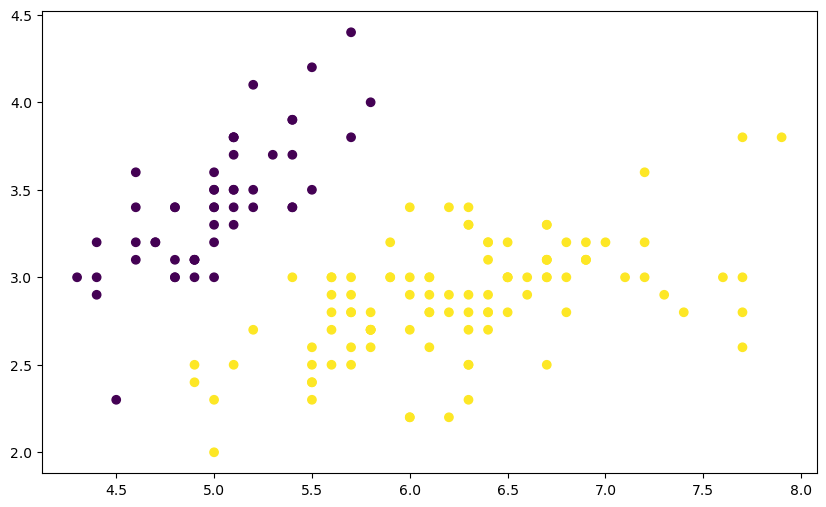

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

面对上图中，深蓝色代表 0，黄色代表 1。接下来，就运用逻辑回归完成对 2 类数据划分。

为了更方便代码的展示，这里将上面提到的逻辑回归模型、损失函数以及梯度下降的代码集中到一起呈现。接下来，就使用 Python 实现逻辑回归的代码。

In [ ]:
def sigmoid(z):
    # Sigmoid 分布函数
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid


def loss(h, y):
    # 损失函数(二元交叉熵损失)
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss


def gradient(X, h, y):
    # 梯度计算
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient


def Logistic_Regression(x, y, lr, num_iter):
    # 逻辑回归过程
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数 计算w^T*x
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值

    return l, w  # 返回迭代后的梯度和参数

然后，我们设定学习率和迭代次数，对数据进行训练。

In [16]:
x = df[["X0", "X1"]].values
y = df["Y"].values
lr = 0.01  # 学习率
num_iter = 300000  # 迭代次数

# 训练
L = Logistic_Regression(x, y, lr, num_iter)
L

(0.025733020875416814, array([ -6.40337885,   7.44770071, -10.92852671]))

根据我们计算得到的权重，分类边界线的函数为：
$$
y = L[1][0] + L[1][1]*x^1 + L[1][2]*x^2
$$

有了分类边界线函数，我们就可以将其绘制到原图中，看一看分类的效果到底如何。

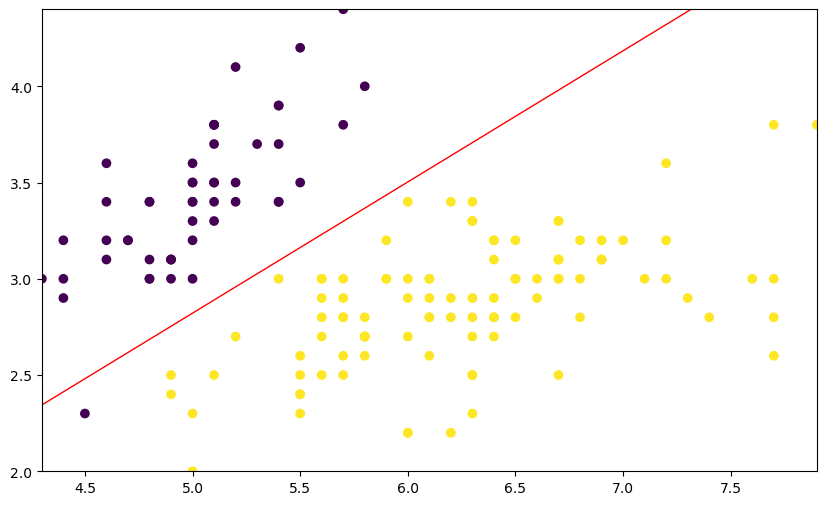

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = (
    df["X0"].min(),
    df["X0"].max(),
)
x2_min, x2_max = (
    df["X1"].min(),
    df["X1"].max(),
)

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")

可以看出，上图中红线代表我们得到的分割线，也就是线性函数。它比较符合两类数据的分离趋势。

除了绘制决策边界，也就是分割线。我们也可以将损失函数的变化过程绘制处理，看一看梯度下降的执行过程。

Text(0, 0.5, 'Loss function')

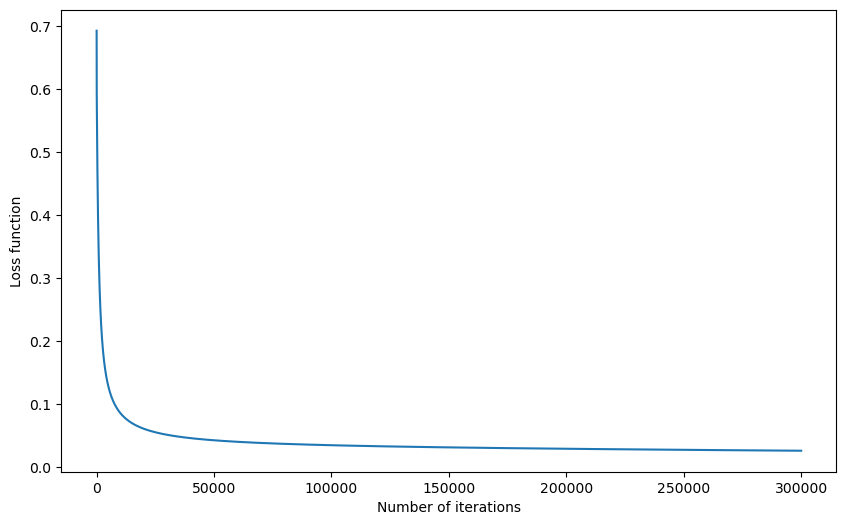

In [18]:
def Logistic_Regression_(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 1

    l_list = []  # 保存损失函数值
    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值
        l_list.append(l)

    return l_list


l_y = Logistic_Regression_(x, y, lr, num_iter)  # 训练

# 绘图
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(l_y))], l_y)
plt.xlabel("Number of iterations")
plt.ylabel("Loss function")

# 逻辑回归scikit-learn实现
上文的内容中，我们了解了逻辑回归的原理以及 Python 实现方式。接下来，我们介绍 scikit-learn 中的逻辑回归方法，这个过程就会简单很多。

在 scikit-learn 中，实现逻辑回归的类及默认参数是：
```python
LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
```

介绍其中几个常用的参数，其余使用默认即可：

* penalty: 惩罚项，默认为$L_2$范数。

* dual: 对偶化，默认为 False。

* tol: 数据解算精度。

* fit_intercept: 默认为 True，计算截距项。

* random_state: 随机数发生器。

* max_iter: 最大迭代次数，默认为 100。

另外，solver 参数用于指定求解损失函数的方法。默认为 liblinear（0.22 开始默认为 lbfgs），适合于小数据集。
那么，我们使用 scikit-learn 构建逻辑回归分类器的代码如下：

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    tol=0.001, max_iter=10000, solver="liblinear"
)  # 设置数据解算精度和迭代次数
model.fit(x, y)
model.coef_, model.intercept_

(array([[ 2.49579289, -4.01011301]]), array([-0.81713932]))

得到的参数和上文 Python 实现得到的参数不一致，原因是我们的求解器不同。同样，我们可以将得到的分类边界线绘制成图。

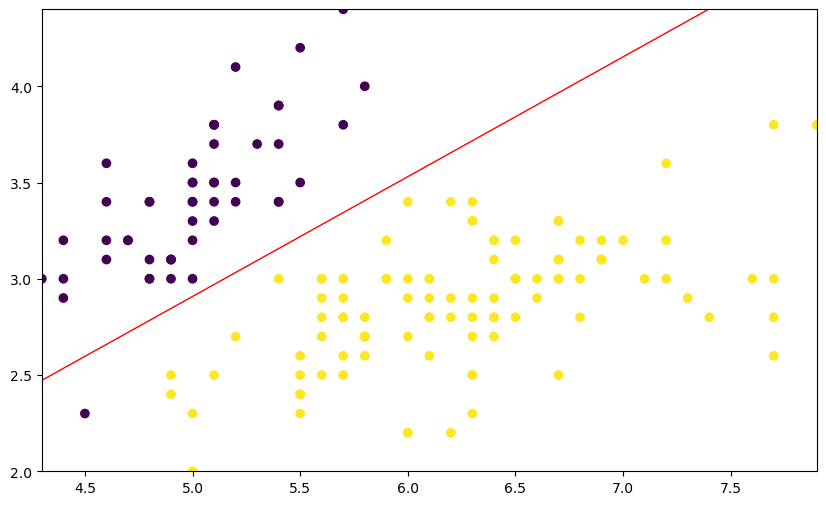

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = df["X0"].min(), df["X0"].max()
x2_min, x2_max = df["X1"].min(), df["X1"].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, model.coef_.T) + model.intercept_).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")

最后，我们可以看一下模型在训练集上的分类准确率

In [21]:
model.score(x, y)

0.9933333333333333

「逻辑」二字是对逻辑分布的简称，也代表是与非，0 和 1 之间的逻辑，象征二分类问题。「回归」则源于线性回归，我们通过线性函数构建线性分类边界来达到分类的效果。